In [108]:
import math
import numpy as np
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [109]:
def f(x):
    return 3*x**2 - 4*x + 5

In [110]:
f(3.0)

20.0

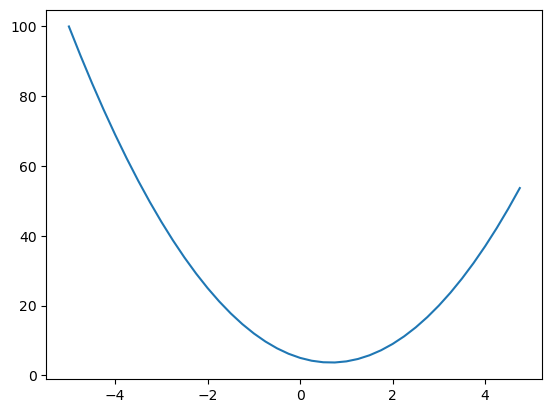

In [111]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [112]:
h = 0.000001
x = 2/3
(f(x+h) - f(x))/h

2.999378523327323e-06

In [113]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c 
print(d)

4.0


In [114]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print('d1', d1)
print('d2', d2) 
print('slope', (d2-d1)/h) #slope! as h goes to 0 this turns into df/dx, where f = a*b + c

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [115]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''): #tuple passed in for efficiency reasons
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0
        self._backward = lambda: None
        self.label = label

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = (other.data) * out.grad
            other.grad = (self.data) * out.grad
            
        out._backward = _backward
        
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        
        return out

    def __repr__(self): #magic method to make printing nicer
        return f"Value(data={self.data})"

In [116]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label= 'e'
d = e + c; d.label ='d'
f = Value(-2.0, label ='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [117]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) 

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

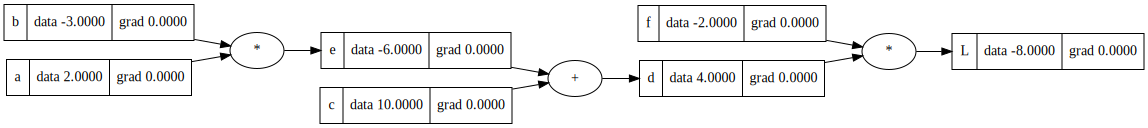

In [118]:
draw_dot(L)

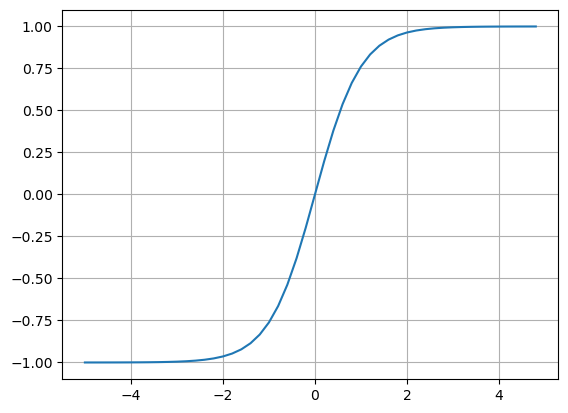

In [119]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid();

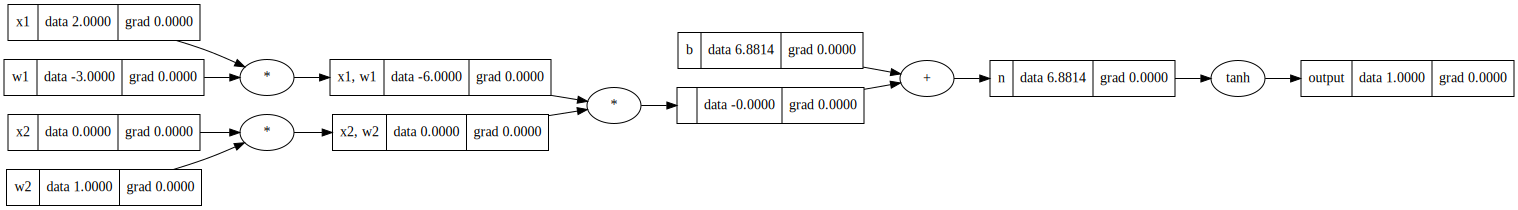

In [120]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b

x1w1 = x1*w1; x1w1.label='x1, w1'
x2w2 = x2*w2; x2w2.label='x2, w2'
x1w1x2w2 = x1w1 * x2w2; label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label ='n'
o = n.tanh(); o.label = 'output'
draw_dot(o)

In [121]:
o.grad = 1.0
o._backward()

In [122]:
n._backward()